In [6]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [7]:
np.random.seed(0)

In [8]:
dates = pd.date_range(start='2020-01-01', periods=365)

In [9]:
water_usage = np.random.poisson(lam=100, size=365) + (np.sin(np.linspace(0, 3 * np.pi, 365)) * 20).astype(int)


In [10]:
water_usage

array([101, 103,  99,  99, 129, 111, 105,  85, 103,  90, 106,  98, 105,
       109, 128, 103, 114, 113,  99, 103, 111, 101, 114, 110,  99, 117,
       102, 122, 124, 120, 107, 108, 108,  95, 117, 116, 118, 110, 103,
       110, 119, 128, 122, 109, 121, 116, 124, 128, 132, 133, 126, 143,
       117, 124, 122, 106, 121, 121, 123, 134, 117, 129, 104, 107, 108,
       105, 129, 116, 125, 126, 126, 120, 109, 127, 113, 124, 107, 120,
       137, 118, 124, 114, 124, 107,  95, 110, 111, 120, 116, 119, 109,
       117, 117, 106, 119, 134, 104, 111, 102, 106, 103, 123, 109, 116,
       110,  96, 103, 115, 121, 107, 131,  97, 109,  97,  83,  98,  94,
       122, 105,  95, 103,  95, 100,  96, 110,  99,  83, 114,  92,  94,
        83, 103, 103,  78,  99,  92, 105,  86,  71,  85,  96,  84,  79,
        69,  98,  82,  91,  84,  87,  97,  87,  89,  90,  84,  87,  78,
        82,  75,  85,  98,  91,  99,  89,  91,  75,  81,  94, 105,  92,
        86,  61,  73,  77,  78,  66,  94,  76,  84,  62,  72,  6

In [11]:
data = pd.DataFrame({'Date': dates, 'WaterUsage': water_usage})
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Weekday'] = data['Date'].dt.weekday


In [12]:
data

,Date,WaterUsage,Month,Day,Weekday
0,2020-01-01,101,1,1,2
1,2020-01-02,103,1,2,3
2,2020-01-03,99,1,3,4
3,2020-01-04,99,1,4,5
4,2020-01-05,129,1,5,6
...,...,...,...,...,...
360,2020-12-26,116,12,26,5
361,2020-12-27,118,12,27,6
362,2020-12-28,90,12,28,0
363,2020-12-29,87,12,29,1


In [13]:
X = data[['Month', 'Day', 'Weekday']]
y = data['WaterUsage']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [15]:
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [16]:
y_pred = model.predict(X_test)

In [17]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [18]:
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 8.914931506849317
Root Mean Squared Error: 10.977396015798611


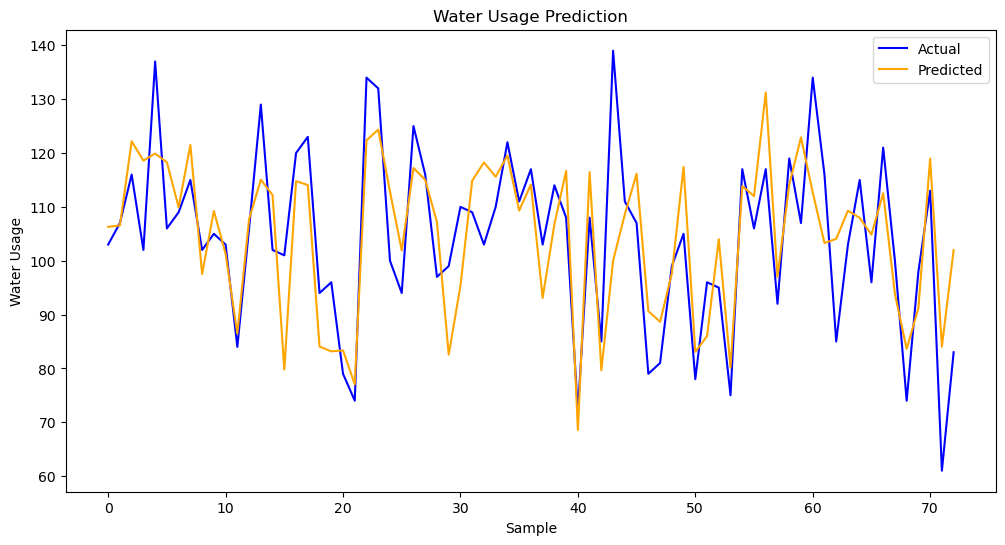

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='orange')
plt.title('Water Usage Prediction')
plt.xlabel('Sample')
plt.ylabel('Water Usage')
plt.legend()
plt.show()

In [20]:
import pickle
with open("water_usage_model.pkl", "wb") as f:
    pickle.dump(model, f)